# (Mini) Data Story

I analyzed a one-year data of Citibike usage in New York City and asked the following questions.
- Q1 : When do they ride citibikes?
- Q2 : Are there any seasonal patterns in usage?
- Q3 : How about daily usage over a year?
- Q4 : Are there any daily patterns in usage during a week?
- Q5 : Doest the weather affect usage? (subscribers only here)
- Concluding summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
%matplotlib inline

In [2]:
# Import Data
data1 = pd.read_csv('./data/citibike_201610_201703.csv')
data2 = pd.read_csv('./data/citibike_201604_201609.csv')

In [3]:
dataset = pd.concat([data1, data2], axis=0)

In [4]:
dataset.head()

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,...,start_month,start_day,start_hour,start_dayofweek,stop Time,stop_year,stop_month,stop_day,stop_hour,stop_dayofweek
0,0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,...,10,1,0,5,2016-10-01 00:05:35,2016,10,1,0,5
1,1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,...,10,1,0,5,2016-10-01 00:06:49,2016,10,1,0,5
2,2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,...,10,1,0,5,2016-10-01 00:07:25,2016,10,1,0,5
3,3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,...,10,1,0,5,2016-10-01 00:06:12,2016,10,1,0,5
4,4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,...,10,1,0,5,2016-10-01 00:45:15,2016,10,1,0,5


# Question: Are there differences in ride patterns between subscribers and non-subscribers?

<b>Q1 : When do they ride citibikes?</b>

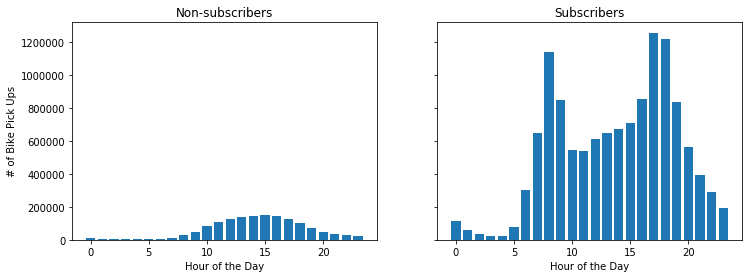

In [5]:
usage_by_hour_usertype = dataset.groupby(['start_hour','User Type']).size().unstack('User Type')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True, sharex=True)
ax1.bar(usage_by_hour_usertype.index, usage_by_hour_usertype['Customer'])
ax1.set_title('Non-subscribers')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('# of Bike Pick Ups')
ax2.bar(usage_by_hour_usertype.index, usage_by_hour_usertype['Subscriber'])
ax2.set_title('Subscribers')
ax2.set_xlabel('Hour of the Day')

Subscribers are likely New Yorkers and they tend to use more often during commuting hours. Non-subscribers are more likely visitors, so the usage peaks during the day. Also, significant fraction of pickups are by the subscribers.

<b>Q2 : Are there any seasonal patterns in usage?</b>

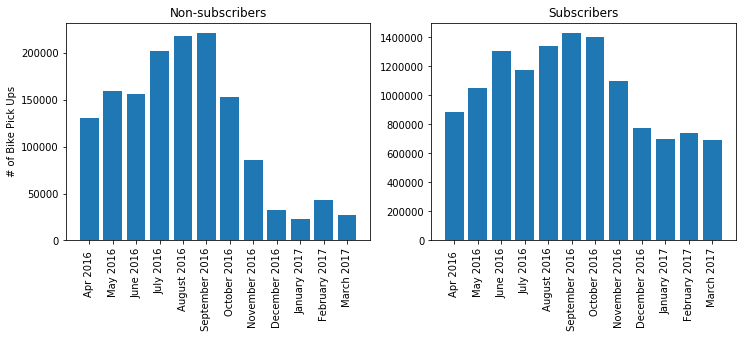

In [6]:
usage_by_month_usertype = dataset.groupby(['start_year', 'start_month','User Type']).size().unstack('User Type').reset_index()
usage_by_month_usertype['month'] = ['Apr 2016 ', 'May 2016', 'June 2016', 'July 2016', \
                                                                       'August 2016', ' September 2016', 'October 2016', 'November 2016', 'December 2016', 
                                                                       'January 2017', 'February 2017', 'March 2017']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=False, sharex=True)
ax1.bar(usage_by_month_usertype.index, usage_by_month_usertype['Customer'])
ax1.set_title('Non-subscribers')
ax1.set_ylabel('# of Bike Pick Ups')
ax1.set_xticklabels(usage_by_month_usertype.month, rotation='vertical')
ax1.set_xticks(range(12))
ax2.bar(usage_by_month_usertype.index, usage_by_month_usertype['Subscriber'])
ax2.set_title('Subscribers')
ax2.set_xticks(range(12))
ax2.set_xticklabels(usage_by_month_usertype.month, rotation='vertical')

The usage goes down during winter months with colder weather. Usage by non-subscribers, who are likely visitors, peaks during the summer time, when a lot of people visit NYC.

<b>Q3 : How about daily usage over a year?</b>

In [7]:
daily_usage = dataset.groupby(['start_year', 'start_month', 'start_day', 'User Type']).size().unstack('User Type')

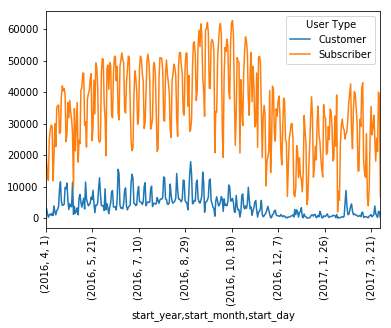

In [8]:
ax = daily_usage.plot(rot='vertical')

<b>Q4 : Are there any daily patterns in usage during a week?</b>

In [9]:
# Usage distribution by the day of the week

# data for non-subscribers
ns1 = dataset[dataset['User Type'] == 'Customer'].groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
ns1.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# data for subscribers
s1 = dataset[dataset['User Type'] == 'Subscriber'].groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
s1.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

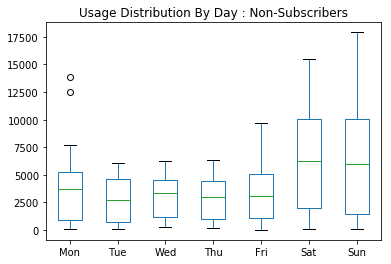

In [10]:
# Box plot the distribution for non-subscribers
ns1.plot(kind='box',  title='Usage Distribution By Day : Non-Subscribers')

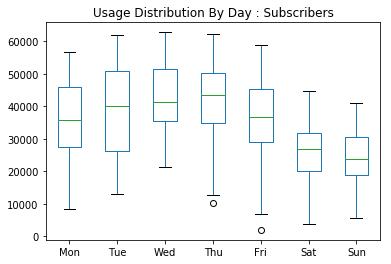

In [11]:
# Box plot the distribution for subscribers
s1.plot(kind='box',  title='Usage Distribution By Day : Subscribers')

As expected, non-subscribers, who are likley visitors, tend to use more often on the weekends than on weekdays. The exact opposite can be said for the subscribers, who are likely New Yorkers that commute during the week.

<b>Q5 : Doest the weather affect usage? (subscribers only here)</b>

In [12]:
# import data table
subs = pd.read_csv('./data/processed/subscribers_extended_2.csv')

In [13]:
def plot_ransac(x, y, ax, xrange=[-1,10], xlabel=None, ylabel=None, title=None, xlim=None, ylim=None, fs=None):

    # Fit line using all data using regular Linear Regression
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)     # make x a vertical vector

    # Robustly fit linear model with RANSAC algorithm
    model_ransac = RANSACRegressor(LinearRegression())
    model_ransac.fit(x.reshape(-1, 1), y)     # make x a vertical vector
    inlier_mask = model_ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_X = np.arange(xrange[0], xrange[1], step=(xrange[1] - xrange[0])/20)
    line_y = model.predict(line_X[:, np.newaxis])
    line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

    # Compare estimated coefficients
    text_coeff = '(coeff = %.2f)' % model.coef_
    text_coeff_ransac = '(coeff = %.2f)' % model_ransac.estimator_.coef_

    lw = 3
    s=150
    ax.scatter(x[inlier_mask], y[inlier_mask], s=s, color='blue', marker='.', label='Inliers', alpha=0.2)
    ax.scatter(x[outlier_mask], y[outlier_mask], s=s, color='yellowgreen', marker='.', label='Outliers', alpha=0.3)
    ax.plot(line_X, line_y, color='green', linestyle=':', linewidth=lw, label=('Linear ' + text_coeff), alpha=0.8)
    ax.plot(line_X, line_y_ransac, color='cornflowerblue', linestyle='--',linewidth=lw, label=('RANSAC ' + text_coeff_ransac), alpha=0.8)
    ax.legend(loc='upper right', fontsize=fs)
    ax.set_title(title, fontsize=fs)
    ax.set_xlabel(xlabel, fontsize=fs)
    ax.set_ylabel(ylabel, fontsize=fs)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


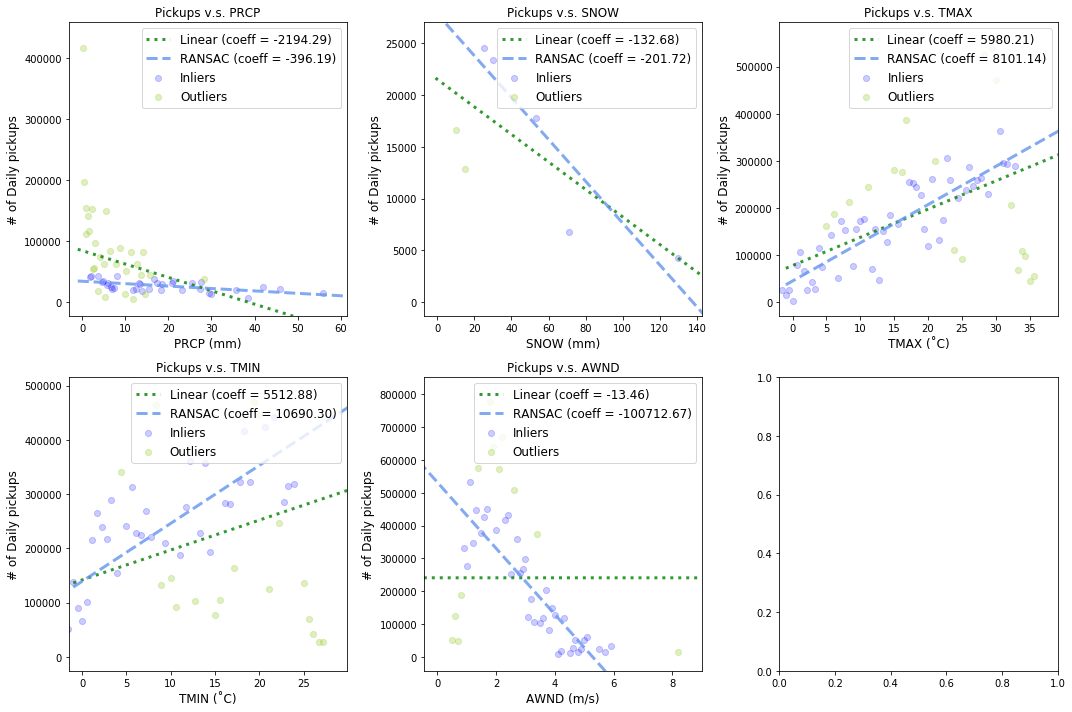

In [14]:
vars2 = ['PRCP', 'SNOW', 'TMAX', 'TMIN', 'AWND']
units = [' (mm)', ' (mm)', ' (˚C)', ' (˚C)', ' (m/s)']

xs2 = []
ys2 = []
xranges2 = []
xlims2 = []
ylims2 = []
xlabels2 = []
ylabel2 = '# of Daily pickups'
titles2 = []

for i, var in enumerate(vars2):
    data = subs[[var, 'pickups']].groupby(var).sum().reset_index()
    if (var == 'PRCP') | (var == 'SNOW'):
        data = data[data[var] != 0]
        
    x = np.array(data[var]).reshape(-1, 1)
    y = np.array(data['pickups']).reshape(-1, 1)
    
    xs2.append(x)
    ys2.append(y)
    xranges2.append([-1, np.max(x)*1.2])
    xlims2.append([-0.055*np.max(x), 1.1*np.max(x)])
    ylims2.append([-0.055*np.max(y), 1.1*np.max(y)])
    xlabels2.append(var + units[i])
    titles2.append('Pickups v.s. ' + var)

# modify the parameters for park info
#xranges2[-1] = [-0.1, 0.3]
#xlabels2[-1] = 'closest_distance_to_park (unit unknown)'

# Plot using the plt_ransac function defined above
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5]
for i in range(5):
    plot_ransac(xs2[i], ys2[i], axes[i], xrange=xranges2[i], xlabel=xlabels2[i], ylabel=ylabel2, title=titles2[i], xlim=xlims2[i], ylim=ylims2[i], fs=12)
plt.tight_layout()

It appears the usage has weak negative correlation with precipitation, snow and wind (AWND). In contrast, the usage tend to goes up as the temperature (both highest and lowest temperatures of the day) goes up.

<b>Concluding Summary</b>

- Subscribers and non-subscribers have different ride patterns. The former appears to use for commuting and use most during the weekdays, while the latter tends to use more on the weekends.
- During the winter months when the temperature goes down, usage tend to go down significantly. This is consistent with the correlation of usage with the temperature data
- Based on these observations, I can comfortably speculate that the subscribers are NYC residents and non-subscribers are visitors. Assuming that, there likely exist differences in trip duration and most popular bike stations for pick-ups and drop-offs. It would be interesting to look at those things next.
- Other things to look at are how location of the bike station affects the usage, along with its distance to subway stations, etc.